In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv('/Users/sarahrestrepo/Desktop/Final_Project/data_cleaning_stroke.csv')

In [78]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [79]:
df.dtypes

gender                       object
age                           int64
hypertension                 object
heart_disease                object
ever_married                 object
work_type                    object
residence_type               object
avg_glucose_level           float64
bmi                         float64
smoking_status               object
stroke                       object
avg_glucose_level_BoxCox    float64
bmi_BoxCox                  float64
dtype: object

Female    58.602466
Male      41.397534
Name: gender, dtype: float64


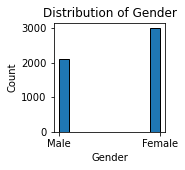

No     90.252496
Yes     9.747504
Name: hypertension, dtype: float64


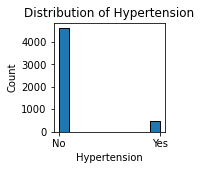

No     94.597769
Yes     5.402231
Name: heart_disease, dtype: float64


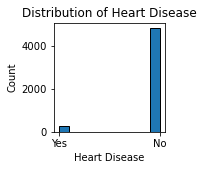

Yes    65.629282
No     34.370718
Name: ever_married, dtype: float64


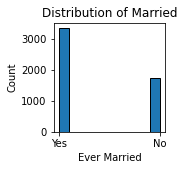

Urban    50.812292
Rural    49.187708
Name: residence_type, dtype: float64


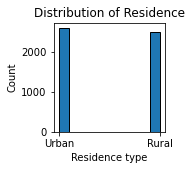

never smoked       37.032687
Unknown            30.221178
formerly smoked    17.302799
smokes             15.443335
Name: smoking_status, dtype: float64


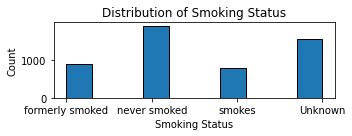

In [80]:
print(df['gender'].value_counts(normalize=True)*100)
plt.figure(figsize=(2, 2))  
plt.hist(df["gender"], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

print(df['hypertension'].value_counts(normalize=True)*100)
plt.figure(figsize=(2, 2))  
plt.hist(df["hypertension"], edgecolor='black')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Distribution of Hypertension')
plt.show()

print(df['heart_disease'].value_counts(normalize=True)*100)
plt.figure(figsize=(2, 2))  
plt.hist(df["heart_disease"], edgecolor='black')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')
plt.show()

print(df['ever_married'].value_counts(normalize=True)*100)
plt.figure(figsize=(2, 2))  
plt.hist(df["ever_married"], edgecolor='black')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.title('Distribution of Married')
plt.show()

print(df['residence_type'].value_counts(normalize=True)*100)
plt.figure(figsize=(2, 2))  
plt.hist(df['residence_type'], edgecolor='black')
plt.xlabel('Residence type')
plt.ylabel('Count')
plt.title('Distribution of Residence')
plt.show()

print(df['smoking_status'].value_counts(normalize=True)*100)
plt.figure(figsize=(5, 2))  
plt.hist(df["smoking_status"], edgecolor='black')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Distribution of Smoking Status')
plt.tight_layout()
plt.show()

#Females are more represented in this data set.
#Only 9% have HTN in this data set.
#Only 5% have heart disease in this data set.
#Majority of ppl in this data set are married or have been married before.
#Distribution of where people live is pretty similar, although slightly more people live in an urban population.
#More people in this population have never smoked before.



In [81]:
#Balancing target column
df_yes = df[df['stroke'] == 'Yes']
df_yes.shape

(249, 13)

In [82]:
df_no = df[df['stroke'] == 'No']
df_no.shape

(4860, 13)

In [83]:
df_yes_up = df_yes.sample(df_no.shape[0], replace=True).reset_index(drop=True)
df_yes_up.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_BoxCox,bmi_BoxCox
4855,Female,39,No,No,Yes,Private,Urban,83.24,26.3,never smoked,Yes,0.921108,3.202375
4856,Female,75,No,No,Yes,Private,Rural,199.20,26.6,Unknown,Yes,0.925870,3.212620
4857,Female,79,No,Yes,Yes,Private,Urban,226.98,29.8,never smoked,Yes,0.926274,3.315327
4858,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes,0.922886,3.393853
4859,Male,80,Yes,Yes,Yes,Private,Urban,175.29,31.5,formerly smoked,Yes,0.925416,3.365547


In [84]:
df_up = pd.concat([df_yes_up, df_no], axis=0).reset_index(drop=True)
df_up.shape

(9720, 13)

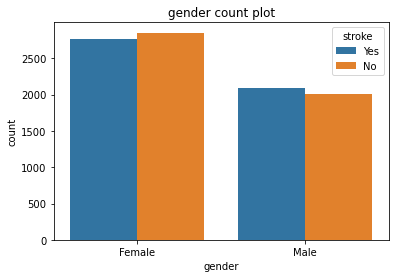

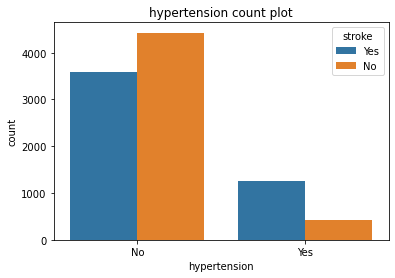

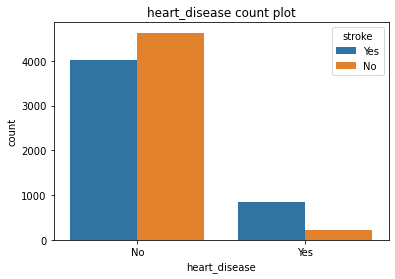

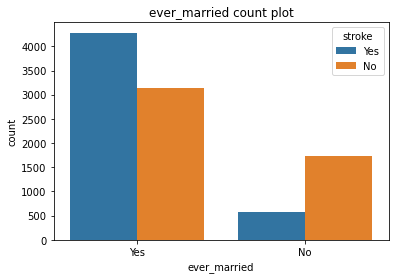

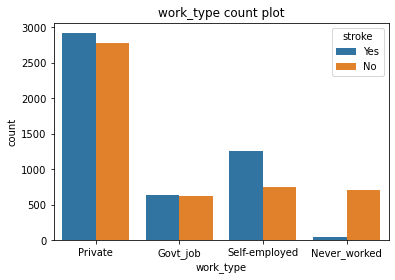

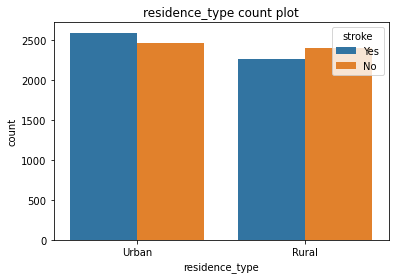

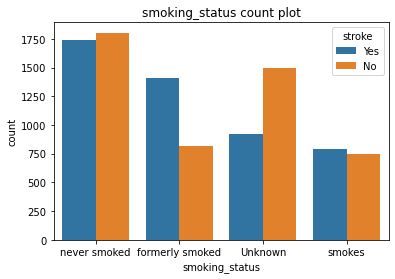

In [85]:
x = ['gender','hypertension','heart_disease','ever_married','work_type','residence_type','smoking_status']
for col in df_up[x]:
    sns.countplot(data = df_up, x=col, hue='stroke')
    plt.title(col+' count plot')
    plt.show()
#There are more Males have higher proportion of having strokes.
#BMI and elevated glucose level also have a positive corralation with strokes. 


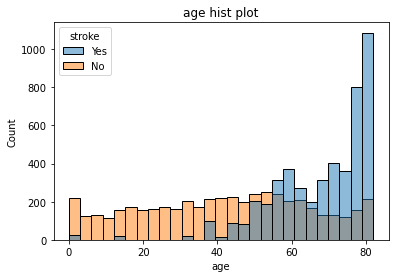

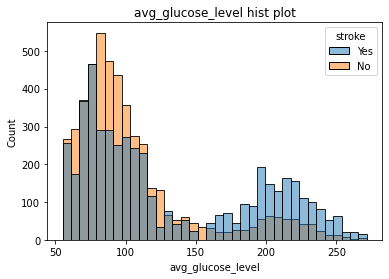

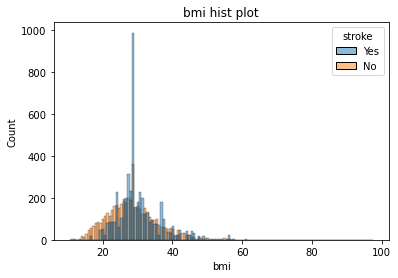

In [87]:
x = ['age','avg_glucose_level','bmi']
for col in df_up[x]:
    sns.histplot(data=df_up, x=col, hue='stroke')
    plt.title(col+' hist plot')
    plt.show()
#We can see age is a big factor in strokes. As age goes up so does the risk for strokes.